## Churn Modeling

The task is to predict whether the customer has closed his account or continues to be a customer

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

### Loading the Data

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


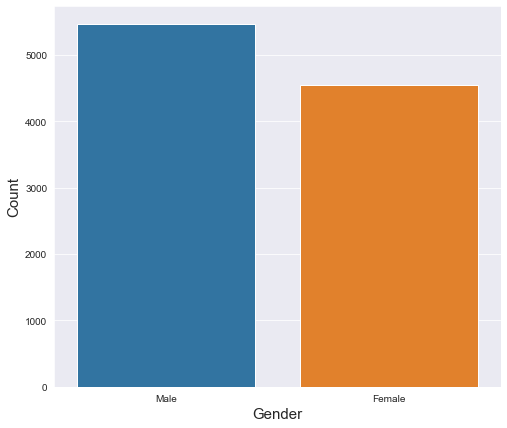

In [9]:
''' value counts of Gender '''
gender_lbl = df.Gender.value_counts()

''' barplot '''
plt.figure(figsize=(8, 7))
sns.barplot(gender_lbl.index, gender_lbl);
plt.xlabel('Gender', fontsize=15);
plt.ylabel('Count', fontsize=15);

In [10]:
''' dropping some rows '''
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

## One Hot encoding

In [11]:
''' one-hot encoding of gender column '''
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


### Splitting Data into Independent and Dependent Features

In [13]:
''' independent and dependent features '''
X = df.iloc[:, :10]
y = df.iloc[:, 10]

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
''' unique value in geography '''
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
''' dummies values '''
geography = pd.get_dummies(X["Geography"], drop_first=True)

In [19]:
''' concatenating geography and X '''
X = pd.concat([X, geography], axis=1)

In [20]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1


In [21]:
''' dropping Geography column '''
X.drop(['Geography'], axis=1, inplace=True)

In [22]:
''' final data '''
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


### Correlation

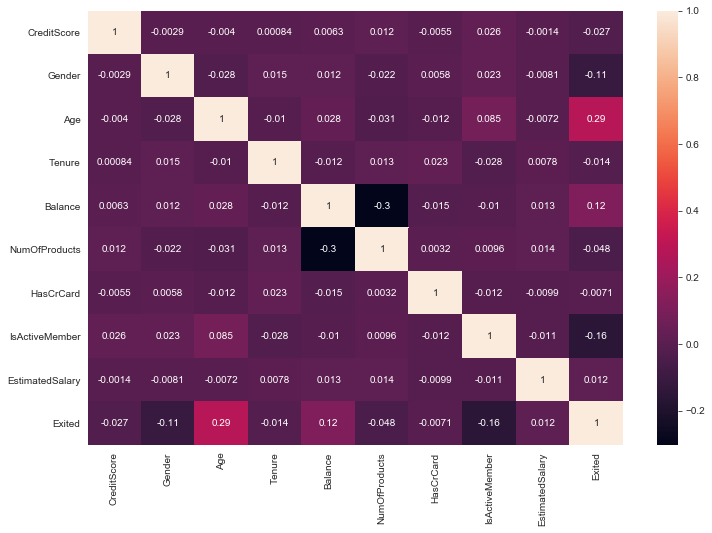

In [23]:
''' correlation matrix '''
plt.figure(figsize=(12,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

### Model Building

In [24]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [25]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (8000, 11)
X_test shape:  (2000, 11)


In [26]:
''' Scaling '''
min_max_sc = MinMaxScaler()

X_train = min_max_sc.fit_transform(X_train)
X_test = min_max_sc.transform(X_test)

In [27]:
X_train

array([[0.634     , 0.        , 0.22857143, ..., 0.81917353, 0.        ,
        1.        ],
       [0.154     , 1.        , 0.34285714, ..., 0.28545936, 1.        ,
        0.        ],
       [0.37      , 0.        , 0.15714286, ..., 0.92818454, 0.        ,
        0.        ],
       ...,
       [0.776     , 1.        , 0.24285714, ..., 0.90717809, 0.        ,
        0.        ],
       [0.48      , 0.        , 0.28571429, ..., 0.74376393, 0.        ,
        1.        ],
       [0.546     , 0.        , 0.42857143, ..., 0.59427515, 1.        ,
        0.        ]])

In [28]:
X_test

array([[0.494     , 0.        , 0.24285714, ..., 0.96429754, 1.        ,
        0.        ],
       [0.346     , 0.        , 0.31428571, ..., 0.64351406, 0.        ,
        0.        ],
       [0.712     , 0.        , 0.34285714, ..., 0.37863951, 0.        ,
        1.        ],
       ...,
       [0.456     , 1.        , 0.25714286, ..., 0.70767563, 0.        ,
        1.        ],
       [0.6       , 1.        , 0.22857143, ..., 0.05632988, 1.        ,
        0.        ],
       [0.446     , 1.        , 0.17142857, ..., 0.96478724, 1.        ,
        0.        ]])

In [29]:
''' Model '''

''' container '''
model = Sequential()

''' 1st Hidden Layer '''
model.add(Dense(units = 6, kernel_initializer='he_uniform',activation='relu',input_dim = 11))

''' 2nd Hidden Layer '''
model.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu'))

''' Classification Layer '''
model.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [30]:
''' lets see how model looks like '''
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [31]:
''' compile the model '''
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
''' training '''
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs= 100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5608 - accuracy: 0.7328 - val_loss: 0.4951 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4909 - accuracy: 0.7929 - val_loss: 0.4801 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4680 - accuracy: 0.7989 - val_loss: 0.4702 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4632 - accuracy: 0.7950 - val_loss: 0.4630 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4568 - accuracy: 0.7964 - val_loss: 0.4565 - val_accuracy: 0.7959
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4477 - accuracy: 0.7925 - val_loss: 0.4521 - val_accuracy: 0.7959
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4475 - accuracy: 0.7949 - val_loss: 0.4469 - val_accuracy: 0.8039

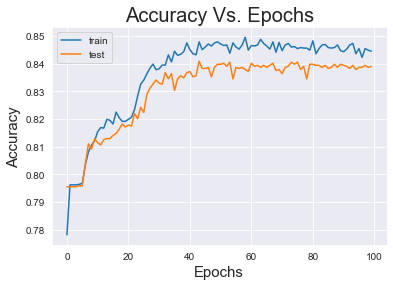

In [33]:
''' training accuracy and validation accuracy graph '''
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Vs. Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['train', 'test'], loc='upper left');

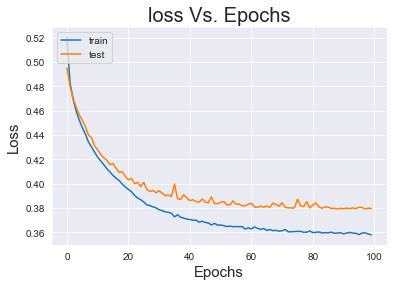

In [34]:
''' training loss and validation loss graph '''
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss Vs. Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['train', 'test'], loc='upper left');

### Model Prediction and Evaluation

In [35]:
''' prediction '''
pred = model.predict(X_test)

In [36]:
preds = []

for p in pred:
    if p > 0.5:
        preds.append(1)
    else:
        preds.append(0)

In [37]:
pd.DataFrame({
    'Actual': y_test, 
    'Predicted': preds
}).head(50)

,Actual,Predicted
9394,0,0
898,1,0
2398,0,0
5906,0,0
2343,0,0
8225,1,1
5506,0,0
6451,0,0
2670,1,1
3497,1,0


In [38]:
print("Accuracy Score: ", accuracy_score(y_test, preds))

Accuracy Score:  0.8375


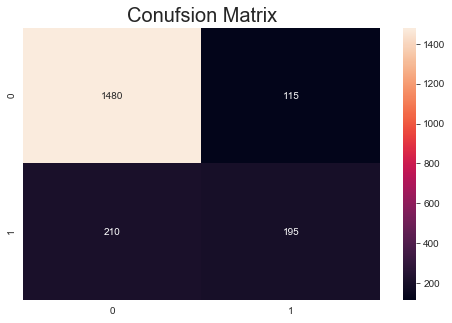

In [39]:
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='g');
plt.title('Conufsion Matrix', fontsize=20);